In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import tsam
import glob
from pygenesys.utils.tsprocess import *
plt.rcParams['figure.figsize'] = (12,9)

In [10]:
files = ['psm_transformed/PIKE_39.623_-90.886_solar_2019_transformed.csv',
         'psm_transformed/DUPAGE_41.852_-88.086_solar_2019_transformed.csv']
df1 = pd.read_csv(files[0],index_col='time')
df2 = pd.read_csv(files[1],index_col='time')

In [15]:
df1.GHI = df1.GHI/df1.GHI.max()
df2.GHI = df2.GHI/df2.GHI.max()

In [21]:
df3 = df1.copy()
df3['GHI_Dupage'] = df2.GHI
df3['ghi_avg'] = (df3.GHI + df3.GHI_Dupage)/2

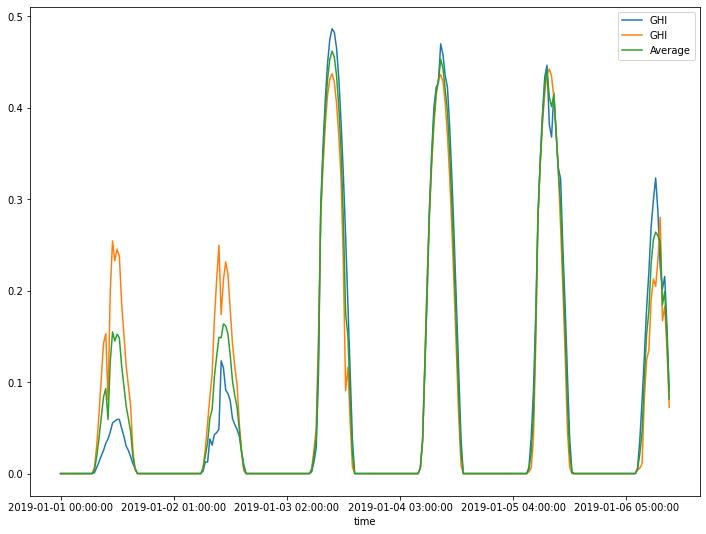

In [22]:
hours = 270
ax = df1[:hours].plot(label='Pike')
df2[:hours].plot(ax=ax, alpha=1, label='Dupage')
df3.ghi_avg[:hours].plot(ax=ax, alpha=1, label='Average')
ax.legend()

In [26]:
df3.mean(axis=0)

GHI           0.163279
GHI_Dupage    0.155068
ghi_avg       0.159173
dtype: float64

In [30]:
df3.GHI = df3.GHI*7
df3.GHI_Dupage = df3.GHI_Dupage*3
df3.ghi_avg = df3.ghi_avg*10

In [31]:
df3['sum_loc'] = df3.GHI + df3.GHI_Dupage

In [32]:
df3.sum(axis=0)

GHI           100122.393204
GHI_Dupage     40751.779324
ghi_avg       278871.254705
sum_loc       140874.172528
dtype: float64